In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the model
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Adding log_loss for better splits
    'max_depth': [None, 5, 10, 15, 20],            # Expanded depth range
    'min_samples_split': [2, 5, 10, 15, 20],       # More split options
    'min_samples_leaf': [1, 2, 4, 6, 8],           # More leaf node variations
    'max_features': ['sqrt', 'log2', None],        # Feature selection method
    'splitter': ['best', 'random']                 # Trying both splitting strategies
}

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Accuracy:", grid_search.best_score_)

# Predict using the best model
y_pred = best_clf.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 15, 'splitter': 'random'}
Best Accuracy: 0.7820526133610246


In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7056

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



In [67]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring="accuracy")

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.7734375 0.65625   0.8046875 0.6796875 0.7421875 0.7265625]
Mean Accuracy: 0.7305
Standard Deviation: 0.0510


In [61]:
confusion_matrix(y_test,clf.predict(X_test))

array([[274,  75],
       [ 88, 101]])

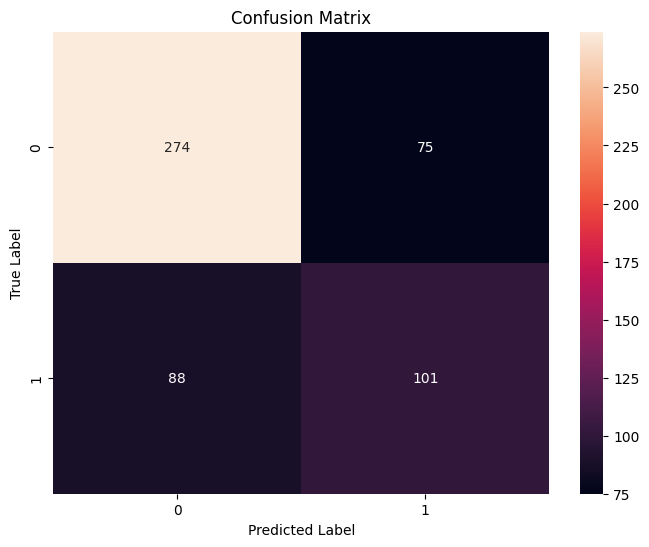

In [62]:
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')       
plt.title('Confusion Matrix')  
plt.show() 

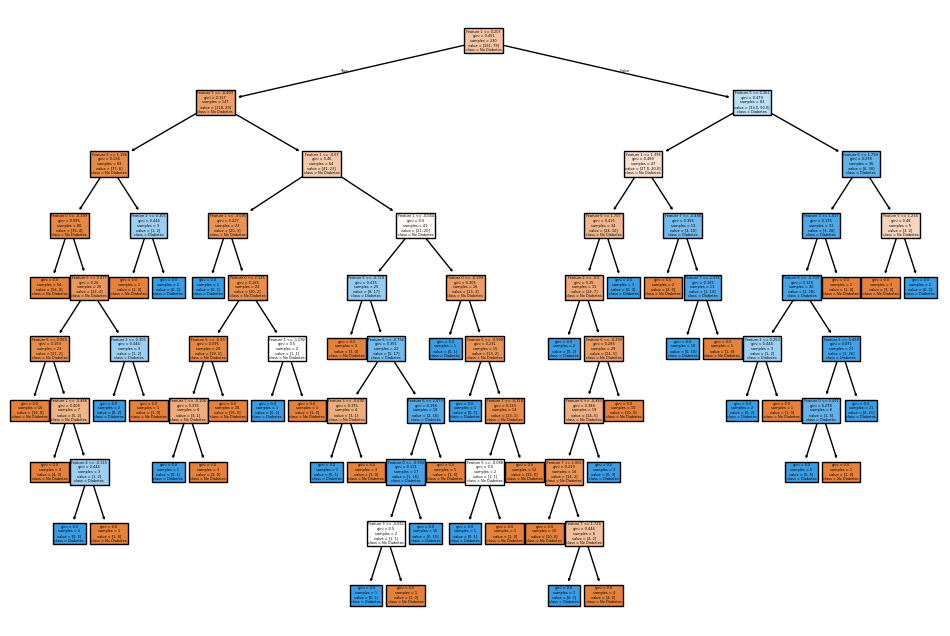

In [63]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=[f"Feature {i}" for i in range(X.shape[1])], 
          class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()